# Parking Inventory 2018
## Author - Angela Q. Yang 
### Data Introduction
Puget Sound Regional Council (PSRC) conducts a periodic inventory of off-street parking in the region. The survey areas include the central business districts (CBDs) of Seattle, Bellevue, Tacoma, Everett, and Bremerton; Seattle’s First Hill, Lower Queen Anne, and University District neighborhoods; and selected ferry terminals at Bainbridge Island, Kingston, and Southworth.

Information collected includes number of stalls, parking costs, parking structure type, address, and geographic location information.
 - COL1: EXPLAIN
 - COL_N: EXPLAIN

In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.getcwd()

'J:\\Projects\\Surveys\\Parking\\Parking2018\\Presentations\\data_viz_meeting_03032019'

In [3]:
parking_2018 = pd.read_csv('parking2018_final.csv')

In [4]:
parking_2018.columns

Index([u'unique_id', u'zone', u'city', u'lot', u'updated', u'address', u'type',
       u'2hr', u'4hr', u'dailycost', u'monthcost', u'paylot', u'max',
       u'structure_type', u'status', u'comments', u'note', u'editor',
       u'neighborhood', u'x_coord', u'y_coord', u'unique_id_2013', u'county',
       u'tract10', u'block10', u'blockgp10', u'geoid10'],
      dtype='object')

In [5]:
parking_2018.describe()

,zone,2hr,4hr,dailycost,monthcost,paylot,max,status,x_coord,y_coord,county,tract10,block10,blockgp10,geoid10
count,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2.372000e+03,2372.000000,2372.000000,2372.000000,2372.000000,2372.000000,2.372000e+03
mean,6.440978,2.303301,3.687858,5.066792,31.814490,0.360455,85.912310,0.105818,1.264768e+06,231338.534992,41.423272,35462.529933,1861.005902,1.836847,5.304146e+14
std,5.345299,4.592670,7.302488,9.901931,80.694586,0.480234,228.671927,0.307669,3.447325e+04,77719.053861,11.465810,28573.876872,967.221971,0.974119,1.147654e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.190670e+06,89162.000000,33.000000,4301.000000,1000.000000,1.000000,5.303300e+14
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.241600e+06,212714.500000,33.000000,7300.000000,1025.000000,1.000000,5.303301e+14
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,1.270220e+06,228032.500000,33.000000,23804.000000,2002.000000,2.000000,5.303302e+14
75%,8.000000,3.000000,5.000000,6.000000,0.000000,1.000000,59.000000,0.000000,1.302380e+06,244610.500000,53.000000,61601.000000,2025.000000,2.000000,5.305306e+14
max,19.000000,39.000000,74.000000,75.000000,403.000000,1.000000,6063.000000,1.000000,1.308090e+06,362524.000000,61.000000,92704.000000,5025.000000,5.000000,5.306104e+14


In [6]:
parking_2018.isnull().sum()

unique_id            0
zone                 0
city                 0
lot                  0
updated           1453
address             99
type                 0
2hr                  0
4hr                  0
dailycost            0
monthcost            0
paylot               0
max                  0
structure_type       0
status               0
comments          2332
note              1678
editor               4
neighborhood      1661
x_coord              0
y_coord              0
unique_id_2013       0
county               0
tract10              0
block10              0
blockgp10            0
geoid10              0
dtype: int64

In [7]:
my_df = parking_2018

### 1. Capacity

(-1, 500)

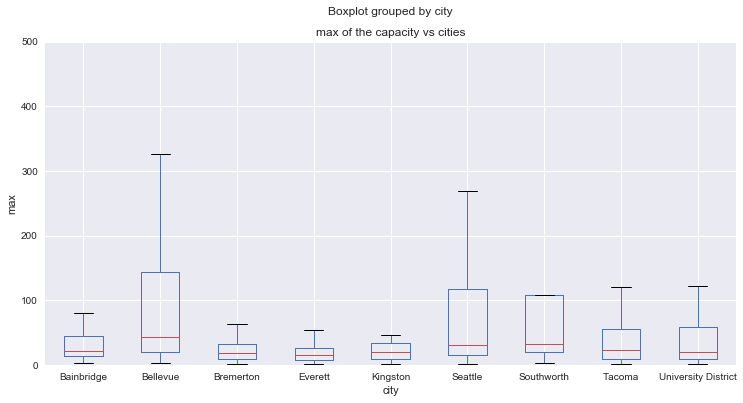

In [8]:
# box plot 
fig = plt.figure(figsize=(12, 6)) # Define plot area
ax = fig.gca() # Define axis 
my_df.loc[:,['city', 'max']].boxplot(by = 'city', ax = ax)
ax.set_title('max of the capacity vs cities') # Give the plot a main title
ax.set_ylabel('max')# Set text for y axis
ax.set_xlabel('city')
ax.set_ylim([-1,500])

### Output files: total stall numbers by geographic boundry

In [9]:
# OccupancyBlockGroups
#g1 = pd.DataFrame(my_df.groupby(['county','city', 'tract10', 'blockgp10'])['lot'].agg(['sum'])).rename(columns={'sum': 'Number of Lots'}).reset_index()
g0 = pd.DataFrame(my_df.groupby(['county', 'city', 'tract10', 'blockgp10'])['max'].agg(['sum'])).rename(columns={'sum': 'Total Stalls'}).reset_index()
#g3 = pd.merge(g1, g2, how='left', on = ['county','city', 'tract10', 'blockgp10'])

g0.to_csv('OccupancyBlockGroups_2018.csv')

In [10]:
# OccupancyZones
#g4 = pd.DataFrame(my_df.groupby(['county','city', 'zone', 'tract10', 'block10'])['lot'].agg(['sum'])).rename(columns={'sum': 'Number of Lots'}).reset_index()
g00 = pd.DataFrame(my_df.groupby(['county','city', 'zone', 'tract10', 'block10'])['max'].agg(['sum'])).rename(columns={'sum': 'Total Stalls'}).reset_index()
#g6 = pd.merge(g4, g5, how='left', on = ['county','city', 'zone', 'tract10', 'block10'])

g00.to_csv('OccupancyZones_2018.csv')

## 2. Price

(-1, 30)

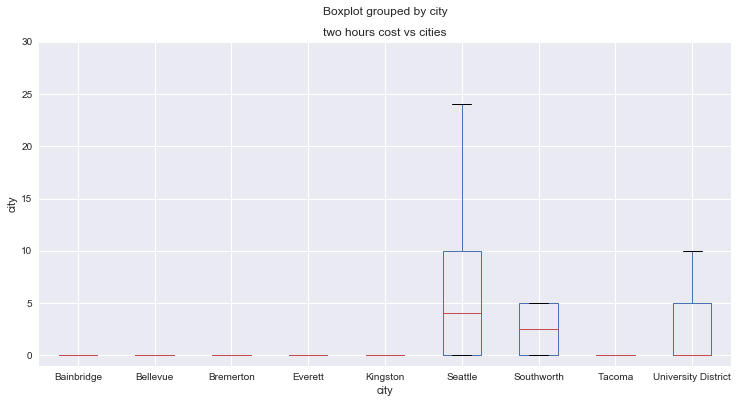

In [11]:
# box plot
fig = plt.figure(figsize=(12, 6)) # Define plot area
ax = fig.gca() # Define axis 
my_df.loc[:,['city', '2hr']].boxplot(by = 'city', ax = ax)
ax.set_title('two hours cost vs cities') # Give the plot a main title
ax.set_ylabel('city')# Set text for y axis
ax.set_xlabel('city')
ax.set_ylim([-1,30])

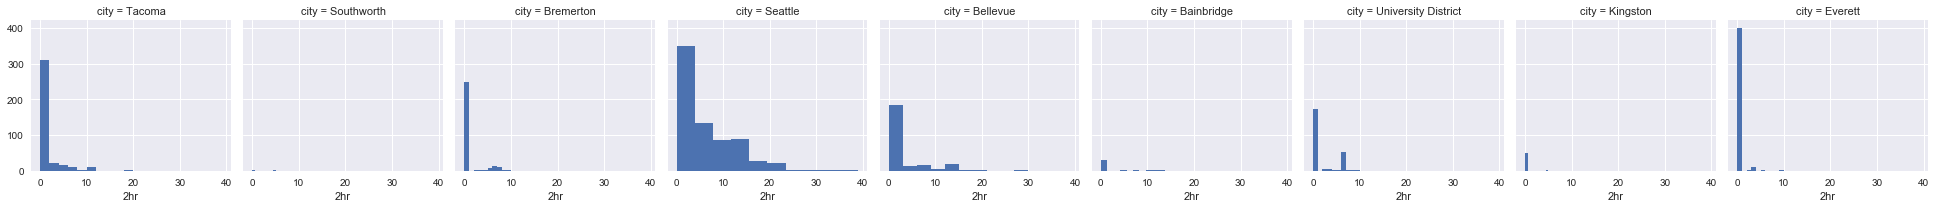

In [12]:
# Facet plot 
# 2 hours rate and city
gr = sns.FacetGrid(my_df, col='city')
gr = gr.map(plt.hist, '2hr')

####  Average cost per parking stall 

In [13]:
# 2 hours cost
my_df['2hr*max'] = my_df['2hr'] * my_df['max']
avg_2hr_stall = my_df.groupby(['city'])['2hr*max'].sum() / my_df.groupby(['city'])['max'].sum()
avg_2hr_stall = pd.DataFrame(avg_2hr_stall, columns = ['2hr_stall']).reset_index()

In [14]:
# 4 hours cost
my_df['4hr*max'] = my_df['4hr'] * my_df['max']
avg_4hr_stall = my_df.groupby(['city'])['4hr*max'].sum() / my_df.groupby(['city'])['max'].sum()
avg_4hr_stall = pd.DataFrame(avg_4hr_stall, columns = ['4hr_stall']).reset_index()

In [15]:
# daily cost
my_df['daily*max'] = my_df['dailycost'] * my_df['max']
avg_daily_stall = my_df.groupby(['city'])['daily*max'].sum() / my_df.groupby(['city'])['max'].sum()
avg_daily_stall = pd.DataFrame(avg_daily_stall, columns = ['daily_stall']).reset_index()

In [16]:
# put all data into one table
avg_4hr_stall['2hr_stall'] = avg_2hr_stall['2hr_stall']
avg_4hr_stall['daily_stall'] = avg_daily_stall['daily_stall']

In [17]:
avg_4hr_stall

,city,4hr_stall,2hr_stall,daily_stall
0,Bainbridge,5.816247,5.816247,5.816247
1,Bellevue,9.242940,6.268598,12.590645
2,Bremerton,1.656874,1.021243,1.803162
3,Everett,1.252438,0.701708,1.990387
4,Kingston,1.840353,0.315897,1.840353
5,Seattle,14.120731,9.251417,20.448986
6,Southworth,4.610390,4.610390,4.610390
7,Tacoma,2.991050,2.174634,4.648930
8,University District,5.924087,3.258072,8.277080


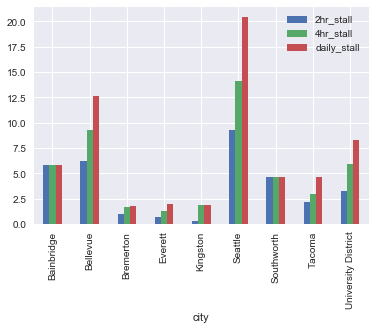

In [18]:
# histogram bar plot
avg_4hr_stall.plot(x="city", y=["2hr_stall", '4hr_stall', 'daily_stall'], kind="bar")

In [19]:
# monthly
my_df['month*max'] = my_df['monthcost'] * my_df['max']
avg_month_stall = my_df.groupby(['city'])['month*max'].sum() / my_df.groupby(['city'])['max'].sum()
avg_month_stall = pd.DataFrame(avg_month_stall, columns = ['month_stall']).reset_index()

In [20]:
avg_month_stall

,city,month_stall
0,Bainbridge,76.517380
1,Bellevue,54.141247
2,Bremerton,21.397300
3,Everett,11.895359
4,Kingston,30.129076
5,Seattle,144.164904
6,Southworth,0.000000
7,Tacoma,40.117484
8,University District,93.594916


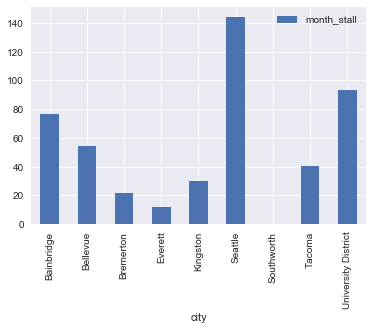

In [21]:
avg_month_stall.plot(x="city", y = ['month_stall'], kind="bar")

### Output files: aggregated hourly cost by geographic boundry
aggregate hourly / daily / monthly cost on 
 - census tract 
 - block group 
 - block (block is smaller than block group)

##### Hourly 

In [22]:
# CostsHourlyBlockGroups

hourly_df = my_df[my_df['2hr'] > 0]
#inflaction CPI from 2013 - 2018 is 7.79%
#http://www.in2013dollars.com/2013-dollars-in-2018?amount=1
hourly_df['2hr'] = hourly_df['2hr'] * 1.08
#g1 = pd.DataFrame(hourly_df.groupby(['county','city', 'tract10', 'blockgp10'])['paylot'].agg(['sum'])).rename(columns={'sum': 'Paylots w/ Hourly Costs'}).reset_index()
g1 = pd.DataFrame(hourly_df.groupby(['county', 'city', 'tract10', 'blockgp10'])['2hr'].agg(['sum','count', 'mean', 'min', 'max'])).rename(columns={'sum': 'Hourly Summed Costs', 'count': 'Hourly total lots', 'mean': 'Average Hourly Costs', 'min': 'Min Hourly Costs', 'max':'Max Hourly Costs'}).reset_index()
#g3 = pd.merge(g1, g2, how='left', on = ['county','city', 'tract10', 'blockgp10'])

g1.to_csv('CostsHourlyBlockGroups_2018.csv')

C:\Users\Angela\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
# CostsHourlyZones
#g4 = pd.DataFrame(hourly_df.groupby(['county','city', 'zone', 'tract10', 'block10'])['paylot'].agg(['sum'])).rename(columns={'sum': 'Paylots w/ Hourly Costs'}).reset_index()
g2 = pd.DataFrame(hourly_df.groupby(['county','city', 'zone', 'tract10', 'block10'])['2hr'].agg(['sum','count', 'mean', 'min', 'max'])).rename(columns={'sum': 'Summed Costs', 'count': 'total lots', 'mean': 'Average Hourly Costs', 'min': 'Min Hourly Costs', 'max':'Max Hourly Costs'}).reset_index()
#g6 = pd.merge(g4, g5, how='left', on = ['county','city', 'zone', 'tract10', 'block10'])

g2.to_csv('CostsHourlyZones_2018.csv')

##### Daily

In [24]:
# CostsDailyBlockGroups
daily_df = my_df[my_df['dailycost'] > 0]
daily_df['dailycost'] = daily_df['dailycost'] * 1.08

#g7 = pd.DataFrame(daily_df.groupby(['county','city', 'tract10', 'blockgp10'])['paylot'].agg(['sum'])).rename(columns={'sum': 'Paylots w/ Daily Costs'}).reset_index()
g3 = pd.DataFrame(daily_df.groupby(['county', 'city', 'tract10', 'blockgp10'])['dailycost'].agg(['sum','count', 'mean', 'min', 'max'])).rename(columns={'sum': 'Hourly Summed Costs', 'count': 'Hourly total lots', 'mean': 'Average Daily Costs', 'min': 'Min Daily Costs', 'max':'Max Daily Costs'}).reset_index()
#g9 = pd.merge(g1, g2, how='left', on = ['county','city', 'tract10', 'blockgp10'])

g3.to_csv('CostsDailyBlockGroups_2018.csv')

C:\Users\Angela\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [25]:
# CostsDailyZones
#g10 = pd.DataFrame(daily_df.groupby(['county','city', 'zone', 'tract10', 'block10'])['paylot'].agg(['sum'])).rename(columns={'sum': 'Paylots w/ Daily Costs'}).reset_index()
g4 = pd.DataFrame(daily_df.groupby(['county','city', 'zone', 'tract10', 'block10'])['dailycost'].agg(['sum','count', 'mean', 'min', 'max'])).rename(columns={'sum': 'Hourly Summed Costs', 'count': 'Hourly total lots', 'mean': 'Average Daily Costs', 'min': 'Min Daily Costs', 'max':'Max Daily Costs'}).reset_index()
#g12 = pd.merge(g4, g5, how='left', on = ['county','city', 'zone', 'tract10', 'block10'])

g4.to_csv('CostsDailyZones_2018.csv')

##### Monthly

In [26]:
# CostsMonthlyBlockGroups
month_df = my_df[my_df['monthcost'] > 0]
month_df['monthcost'] = month_df['monthcost']  * 1.08

#g1 = pd.DataFrame(month_df.groupby(['county','city', 'tract10', 'blockgp10'])['paylot'].agg(['sum'])).rename(columns={'sum': 'Paylots w/ Monthly Costs'}).reset_index()
g5 = pd.DataFrame(month_df.groupby(['county', 'city', 'tract10', 'blockgp10'])['monthcost'].agg(['sum','count', 'mean', 'min', 'max'])).rename(columns={'sum': 'Hourly Summed Costs', 'count': 'Hourly total lots', 'mean': 'Average Monthly Costs', 'min': 'Min Monthly Costs', 'max':'Max Monthly Costs'}).reset_index()
#g3 = pd.merge(g1, g2, how='left', on = ['county','city', 'tract10', 'blockgp10'])

g5.to_csv('CostsMonthlyBlockGroups_2018.csv')

C:\Users\Angela\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [27]:
# CostsMonthlyZones
#g4 = pd.DataFrame(month_df.groupby(['county','city', 'zone', 'tract10', 'block10'])['paylot'].agg(['sum'])).rename(columns={'sum': 'Paylots w/ Monthly Costs'}).reset_index()
g6 = pd.DataFrame(month_df.groupby(['county','city', 'zone', 'tract10', 'block10'])['monthcost'].agg(['sum','count', 'mean', 'min', 'max'])).rename(columns={'sum': 'Summed Costs', 'count': 'total lots', 'mean': 'Average Monthly Costs', 'min': 'Min Monthly Costs', 'max':'Max Monthly Costs'}).reset_index()
#g6 = pd.merge(g4, g5, how='left', on = ['county','city', 'zone', 'tract10', 'block10'])

g6.to_csv('CostsMonthlyZones_2018.csv')

### Changes: hourly, daily, monthly + capacity

In [28]:
g7 = pd.merge(g1, g3, how='outer', on = ['county','city', 'tract10', 'blockgp10'])

In [29]:
g8 = pd.merge(g7, g5, how='outer', on = ['county','city', 'tract10', 'blockgp10'])

In [30]:
g9 = pd.merge(g0, g8, how='outer', on = ['county','city', 'tract10', 'blockgp10'])

In [31]:
g10 = g9[['county', 'city', 'tract10', 'blockgp10', 'Average Hourly Costs', 'Average Daily Costs', 'Average Monthly Costs', 'Total Stalls']]

In [32]:
g10.isnull().sum()

county                    0
city                      0
tract10                   0
blockgp10                 0
Average Hourly Costs     18
Average Daily Costs      18
Average Monthly Costs    34
Total Stalls              0
dtype: int64

In [33]:
g10

,county,city,tract10,blockgp10,Average Hourly Costs,Average Daily Costs,Average Monthly Costs,Total Stalls
0,33,Bellevue,23601,2,NaN,NaN,NaN,1158
1,33,Bellevue,23700,3,4.320000,6.264000,NaN,2357
2,33,Bellevue,23801,1,5.400000,12.960000,NaN,556
3,33,Bellevue,23803,1,8.610000,19.224000,197.228057,5212
4,33,Bellevue,23803,2,8.640000,18.360000,228.420000,4053
5,33,Bellevue,23804,1,15.120000,40.320000,189.000000,8050
6,33,Bellevue,23804,2,11.081739,22.615200,217.498500,12616
7,33,Bellevue,23804,3,12.272727,22.189091,247.914000,11676
8,33,Seattle,7000,3,11.664000,30.024000,133.200000,396
9,33,Seattle,7000,5,7.020000,12.420000,129.240000,561


### 2013 data
Tricks: there might be many new lots in 2018 don't have monthly information availabel. It will impact the final-average parking cost. So - I want to find out 1: if the previous parking cost carry over to the new cost. 2: how to calculate the 2018 average cost, giving that there are some no-cost values. 

In [35]:
# 2013 parking data
parking_2013_monthly = pd.read_csv('CostsMonthlyBlockGroups_2013.csv')
p1 = parking_2013_monthly
parking_2013_daily = pd.read_csv('CostsDailyBlockGroups_2013.csv')
p2 = parking_2013_daily
parking_2013_hourly = pd.read_csv('CostsHourlyBlockGroups_2013.csv')
p3 = parking_2013_hourly
parking_2013_max = pd.read_csv('OccupancyBlockGroups_2013.csv')
p4 = parking_2013_max

In [36]:
p5 = pd.merge(p1, p2, how='outer', on = ['County','City', 'Tract', 'Block Group'])

In [37]:
p6 = pd.merge(p5, p3, how='outer', on = ['County','City', 'Tract', 'Block Group'])

In [38]:
p7 = pd.merge(p6, p4, how='outer', on = ['County','City', 'Tract', 'Block Group'])

In [39]:
p7.columns

Index([u'County', u'City', u'Tract', u'Block Group',
       u' Paylots w/ Monthly Costs ', u'Summed Costs_x', u'Min Monthly Costs',
       u'Max Monthly Costs', u'Average Monthly Costs',
       u' Paylots w/ Daily Costs ', u'Summed Costs_y', u'Min Daily Costs',
       u'Max Daily Costs', u'Average Daily Costs',
       u' Paylots w/ Hourly Costs ', u'Summed Costs', u'Min Hourly Costs',
       u'Max Hourly Costs', u'Average Hourly Costs', u'Unnamed: 9',
       u' Number of Lots ', u'Total Stalls', u' Total AM Car Count ',
       u' Total PM Car Count ', u' Average Total Stalls ',
       u' Average AM Car Count ', u' Average PM Car Count ',
       u'AM Occupancy Rate', u'PM Occupancy Rate',
       u'Average Daily Occupancy Rate'],
      dtype='object')

In [40]:
p8 = p7[['County','City', 'Tract', 'Block Group', 'Average Hourly Costs', 'Average Daily Costs', 'Average Monthly Costs', 'Total Stalls']]

In [41]:
p8.dtypes

County                    object
City                      object
Tract                      int64
Block Group                int64
Average Hourly Costs     float64
Average Daily Costs      float64
Average Monthly Costs    float64
Total Stalls             float64
dtype: object

In [42]:
p10 = p8.rename(columns={'Block Group':'blockgp10', 'Tract':'tract10', 'City':'city', 'County':'county',
                        'Average Hourly Costs':'Average Hourly Costs 13', 'Average Daily Costs':'Average Daily Costs 13',
                        'Average Monthly Costs':'Average Monthly Costs 13', 'Total Stalls': 'Total Stalls 13'})

### Compare 2018 to 2013, averaged by blockgroup

In [43]:
c1 = pd.merge(g10, p10, how='outer', on = ['tract10', 'blockgp10'])

In [44]:
c1.head()

,county_x,city_x,tract10,blockgp10,Average Hourly Costs,Average Daily Costs,Average Monthly Costs,Total Stalls,county_y,city_y,Average Hourly Costs 13,Average Daily Costs 13,Average Monthly Costs 13,Total Stalls 13
0,33,Bellevue,23601,2,NaN,NaN,NaN,1158,King,Bellevue,NaN,NaN,NaN,1163.0
1,33,Bellevue,23700,3,4.32,6.264,NaN,2357,King,Bellevue,4.25,5.5,NaN,2145.0
2,33,Bellevue,23801,1,5.40,12.960,NaN,556,King,Bellevue,NaN,15.0,NaN,1299.0
3,33,Bellevue,23803,1,8.61,19.224,197.228057,5212,King,Bellevue,4.83,12.5,130.36,4429.0
4,33,Bellevue,23803,2,8.64,18.360,228.420000,4053,King,Bellevue,8.25,14.0,171.52,4163.0


In [45]:
c1.dtypes

county_x                      int64
city_x                       object
tract10                       int64
blockgp10                     int64
Average Hourly Costs        float64
Average Daily Costs         float64
Average Monthly Costs       float64
Total Stalls                  int64
county_y                     object
city_y                       object
Average Hourly Costs 13     float64
Average Daily Costs 13      float64
Average Monthly Costs 13    float64
Total Stalls 13             float64
dtype: object

In [46]:
c1['diff_hour']= c1['Average Hourly Costs'] - c1['Average Hourly Costs 13']
c1['diff_daily']= c1['Average Daily Costs'] - c1['Average Daily Costs 13']
c1['diff_month']= c1['Average Monthly Costs'] - c1['Average Monthly Costs 13']
c1['diff_stall']= c1['Total Stalls'] - c1['Total Stalls 13']

In [47]:
c1['pp_hour']= np.abs(c1['diff_hour']) / c1['Average Hourly Costs 13']
c1['pp_daily']= np.abs(c1['diff_daily']) / c1['Average Daily Costs 13']
c1['pp_month']= np.abs(c1['diff_month']) / c1['Average Monthly Costs 13'] 
c1['pp_stall']= np.abs(c1['diff_stall']) / c1['Total Stalls 13'] 

In [48]:
c1[['Average Hourly Costs', 'Average Hourly Costs 13']].head()

,Average Hourly Costs,Average Hourly Costs 13
0,NaN,NaN
1,4.32,4.25
2,5.40,NaN
3,8.61,4.83
4,8.64,8.25


In [49]:
c1.to_csv('2018_2013.csv')

### compare 2018 to 2013, averaged by city level

In [53]:
# 2013
# 2013 parking data
parking_2013_monthly = pd.read_csv('CostsMonthlyBlockGroups_2013.csv')
a1 = parking_2013_monthly
parking_2013_daily = pd.read_csv('CostsDailyBlockGroups_2013.csv')
a2 = parking_2013_daily
parking_2013_hourly = pd.read_csv('CostsHourlyBlockGroups_2013.csv')
a3 = parking_2013_hourly
parking_2013_max = pd.read_csv('OccupancyBlockGroups_2013.csv')
a4 = parking_2013_max

In [54]:
a1.head()

,County,City,Tract,Block Group,Paylots w/ Monthly Costs,Summed Costs,Min Monthly Costs,Max Monthly Costs,Average Monthly Costs
0,King,Bellevue,23803,1,7,912.50,100.0,187.5,130.36
1,King,Bellevue,23803,2,4,686.06,125.0,200.0,171.52
2,King,Bellevue,23804,2,18,3416.73,130.0,295.0,189.82
3,King,Bellevue,23804,3,3,520.00,150.0,210.0,173.33
4,King,Seattle,7000,3,3,364.00,60.0,152.0,121.33


In [61]:
a1.columns

Index([u'County', u'City', u'Tract', u'Block Group',
       u' Paylots w/ Monthly Costs ', u'Summed Costs', u'Min Monthly Costs',
       u'Max Monthly Costs', u'Average Monthly Costs'],
      dtype='object')

In [62]:
parking_2013_monthly.groupby(['City'])[['Summed Costs', 'Paylots w/ Monthly Costs ']].agg(['sum'])

KeyError: "Columns not found: 'Paylots w/ Monthly Costs '"

## 3. Lot Type

In [50]:
my_df.columns 

Index([u'unique_id', u'zone', u'city', u'lot', u'updated', u'address', u'type',
       u'2hr', u'4hr', u'dailycost', u'monthcost', u'paylot', u'max',
       u'structure_type', u'status', u'comments', u'note', u'editor',
       u'neighborhood', u'x_coord', u'y_coord', u'unique_id_2013', u'county',
       u'tract10', u'block10', u'blockgp10', u'geoid10', u'2hr*max',
       u'4hr*max', u'daily*max', u'month*max'],
      dtype='object')

In [51]:
my_df['structure_type'].value_counts()


S      1844
G       441
G/S      84
s         3
Name: structure_type, dtype: int64

In [52]:
# the lot type here is different from 2013's data. 